In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from os import mkdir
from os.path import isdir
from shutil import rmtree

import seaborn as sns
from scipy.stats import kruskal
import itertools

chain = lambda vec, factors: list(itertools.chain.from_iterable([[x] * factor for x, factor in zip(vec, factors)]))

In [2]:
if not isdir('covidintegrate_fig'):
    mkdir('covidintegrate_fig')

/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


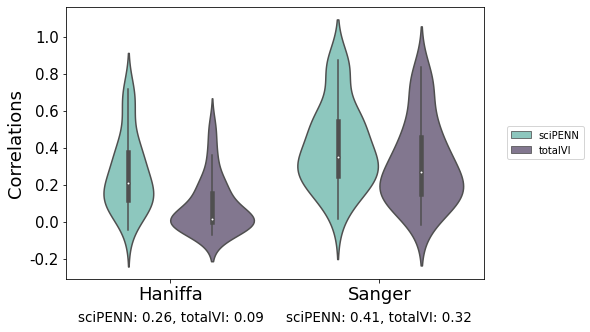

In [3]:
corrs_haniffa = {'sciPENN': pd.read_csv('corrs_results/scipenn_covidintegratebig.csv', index_col = 0), 'totalVI': pd.read_csv('corrs_results/totalvi_covidintegratebig.csv', index_col = 0)}
corrs_sanger = {'sciPENN': pd.read_csv('corrs_results/scipenn_covidintegratesmall.csv', index_col = 0), 'totalVI': pd.read_csv('corrs_results/totalvi_covidintegratesmall.csv', index_col = 0)}

index_haniffa = pd.read_csv('corrs_results/scipenn_covidintegratebig.csv', index_col = 0).index
corrs_haniffa = {key: corrs_haniffa[key].loc[index_haniffa] for key in corrs_haniffa}

index_sanger = pd.read_csv('corrs_results/scipenn_covidintegratesmall.csv', index_col = 0).index
corrs_sanger = {key: corrs_sanger[key].loc[index_sanger] for key in corrs_sanger}

scipen_corrs_han = corrs_haniffa['sciPENN'].mean(axis = 1)
totalvi_corrs_han = corrs_haniffa['totalVI'].mean(axis = 1)

scipen_corrs_sang = corrs_sanger['sciPENN'].mean(axis = 1)
totalvi_corrs_sang = corrs_sanger['totalVI'].mean(axis = 1)

corrs = [scipen_corrs_han, scipen_corrs_sang, totalvi_corrs_han, totalvi_corrs_sang]
mean_corrs = [x.mean() for x in corrs]

d1, d2 = len(scipen_corrs_han), len(scipen_corrs_sang)

data = {'Correlations': np.concatenate(corrs),
        'Method': chain(['sciPENN', 'totalVI'], [d1 + d2, d1 + d2]),
        'Dataset': chain(['Haniffa', 'Sanger'] * 2, [d1, d2] * 2)}
data = pd.DataFrame(data)

f, ax = plt.subplots(1, 1, figsize = (7.5, 5))
sns.violinplot(ax = ax, x = 'Dataset', y = 'Correlations', hue = 'Method', data = data, palette = ["#83D1C4","#817393","#F17950"])

ax.set_title(f"sciPENN: {mean_corrs[0]:.2f}, totalVI: {mean_corrs[2]:.2f}", loc = 'left', x = 0.03, y = - 0.18, size = 13.5)
ax.set_title(f"sciPENN: {mean_corrs[1]:.2f}, totalVI: {mean_corrs[3]:.2f}", x = .97, y = - 0.18, loc = 'right', size = 13.5)

ax.set_ylabel('Correlations', size = 18)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 18)
ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], fontsize = 15)
lgd = ax.legend(bbox_to_anchor = (1.25, 0.5), loc = 'center right', ncol=1)


ax.figure.savefig('covidintegrate_fig/corrplot.pdf', bbox_extra_artists = (lgd,), bbox_inches='tight')

/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


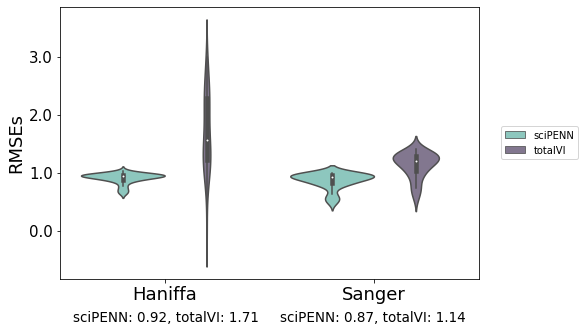

In [4]:
mses_haniffa = {'sciPENN': pd.read_csv('mse_results/scipenn_covidintegratebig.csv', index_col = 0), 'totalVI': pd.read_csv('mse_results/totalvi_covidintegratebig.csv', index_col = 0)}
mses_sanger = {'sciPENN': pd.read_csv('mse_results/scipenn_covidintegratesmall.csv', index_col = 0), 'totalVI': pd.read_csv('mse_results/totalvi_covidintegratesmall.csv', index_col = 0)}

mses_haniffa = {key: mses_haniffa[key].loc[index_haniffa]**(1/2) for key in mses_haniffa}
mses_sanger = {key: mses_sanger[key].loc[index_sanger]**(1/2) for key in mses_sanger}

scipen_mses_han = mses_haniffa['sciPENN'].mean(axis = 1)
totalvi_mses_han = mses_haniffa['totalVI'].mean(axis = 1)

scipen_mses_sang = mses_sanger['sciPENN'].mean(axis = 1)
totalvi_mses_sang = mses_sanger['totalVI'].mean(axis = 1)

mses = [scipen_mses_han, scipen_mses_sang, totalvi_mses_han, totalvi_mses_sang]
mean_mses = [x.mean() for x in mses]

d1, d2 = len(scipen_mses_han), len(scipen_mses_sang)

data = {'RMSEs': np.concatenate(mses),
        'Method': chain(['sciPENN', 'totalVI'], [d1 + d2, d1 + d2]),
        'Dataset': chain(['Haniffa', 'Sanger'] * 2, [d1, d2] * 2)}
data = pd.DataFrame(data)

f, ax = plt.subplots(1, 1, figsize = (7.5, 5))
sns.violinplot(ax = ax, x = 'Dataset', y = 'RMSEs', hue = 'Method', data = data, palette = ["#83D1C4","#817393","#F17950"])

ax.set_title(f"sciPENN: {mean_mses[0]:.2f}, totalVI: {mean_mses[2]:.2f}", loc = 'left', x = 0.03, y = - 0.18, size = 13.5)
ax.set_title(f"sciPENN: {mean_mses[1]:.2f}, totalVI: {mean_mses[3]:.2f}", x = .97, y = - 0.18, loc = 'right', size = 13.5)

ax.set_ylabel('RMSEs', size = 18)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 18)
ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], fontsize = 15)
lgd = ax.legend(bbox_to_anchor = (1.25, 0.5), loc = 'center right', ncol=1)

ax.figure.savefig('covidintegrate_fig/msesplot.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [5]:
scipenn_embedding = sc.read('scipenn_covidintegrateembedding.h5ad')

sc.pp.pca(scipenn_embedding, n_comps = 20)
sc.pp.neighbors(scipenn_embedding, n_pcs = 20)
sc.tl.umap(scipenn_embedding)

batch_map = {cell[:-2]: 'Haniffa' if name[:4] == 'DS-1' else 'Sanger' for cell, name in zip(scipenn_embedding.obs.index, scipenn_embedding.obs['batch'])}

scipenn_embedding = pd.DataFrame(scipenn_embedding.obsm['X_umap'], index = scipenn_embedding.obs.index)
scipenn_embedding['Batch'] = [batch_map[cell[:-2]] for cell in scipenn_embedding.index]
scipenn_embedding = scipenn_embedding.groupby('Batch')

In [6]:
totalvi_embedding = pd.read_csv('totalvi_covidintegrateembedding.csv', index_col = 0)
idx = totalvi_embedding.index
totalvi_embedding = AnnData(totalvi_embedding)
totalvi_embedding.obs.index = idx 

sc.pp.neighbors(totalvi_embedding, n_pcs = 0, use_rep = None)
sc.tl.umap(totalvi_embedding)

totalvi_embedding = pd.DataFrame(totalvi_embedding.obsm['X_umap'], index = totalvi_embedding.obs.index)
totalvi_embedding['Batch'] = [batch_map[cell] for cell in totalvi_embedding.index]
totalvi_embedding = totalvi_embedding.groupby('Batch')

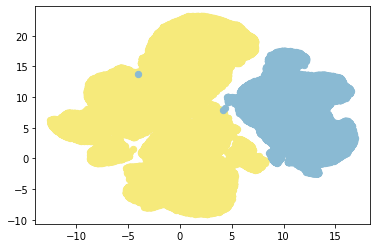

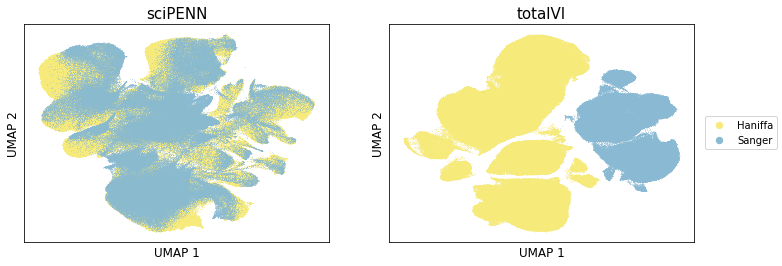

In [7]:
_, ax =  plt.subplots(1)
f, axs = plt.subplots(1, 2, figsize = (12, 4))

names = ['Haniffa', 'Sanger']
colormap = {'Haniffa': '#F6EA7BFF', 'Sanger': '#8ABAD3FF'}

def customize_axes(ax, name):
    ax.set_title(name, size = 15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('UMAP 1', size = 12)
    ax.set_ylabel('UMAP 2', size = 12)
    
method_names = ['sciPENN', 'totalVI']
[customize_axes(ax, name) for ax, name in zip(axs, method_names)]

for name in names:
    group = scipenn_embedding.get_group(name)
    axs[0].scatter(group[0], group[1], linewidth = 0, s = 1, marker = '.', label = name, c = colormap[name])
    
    group = totalvi_embedding.get_group(name)
    axs[1].scatter(group[0], group[1], linewidth = 0, s = 1, marker = '.', label = name, c = colormap[name])
    
    ax.scatter(group[0], group[1], label = name, c = colormap[name], s = 40)

Line, Label = ax.get_legend_handles_labels()
f.legend(Line, Label, loc = 'center right')
f.savefig('covidintegrate_fig/embeddings.png', dpi = 300)

In [8]:
scipenn = sc.read("scipenn_covidintegratebig.h5ad")
scipenn_features_haniffa = AnnData(scipenn.layers['imputed'])
scipenn_features_haniffa.var.index, scipenn_features_haniffa.obs.index = scipenn.var.index, scipenn.obs.index

truth_haniffa = AnnData(scipenn.X)
truth_haniffa.var.index, truth_haniffa.obs.index = scipenn.var.index, scipenn.obs.index

In [9]:
scipenn = sc.read("scipenn_covidintegratesmall.h5ad")
scipenn_features_sanger = AnnData(scipenn.layers['imputed'])
scipenn_features_sanger.var.index, scipenn_features_sanger.obs.index = scipenn.var.index, scipenn.obs.index

truth_sanger = AnnData(scipenn.X)
truth_sanger.var.index, truth_sanger.obs.index = scipenn.var.index, scipenn.obs.index

In [10]:
totalvi_features_haniffa = pd.read_csv("totalvi_covidintegratebigfeatures.csv", index_col = 0)
features, indices = totalvi_features_haniffa.columns, totalvi_features_haniffa.index
totalvi_features_haniffa = AnnData(totalvi_features_haniffa)
totalvi_features_haniffa.var.index, totalvi_features_haniffa.obs.index = features, indices

In [11]:
totalvi_features_sanger = pd.read_csv("totalvi_covidintegratesmallfeatures.csv", index_col = 0)
features, indices = totalvi_features_sanger.columns, totalvi_features_sanger.index
totalvi_features_sanger = AnnData(totalvi_features_sanger)
totalvi_features_sanger.var.index, totalvi_features_sanger.obs.index = features, indices

In [12]:
sc.pp.neighbors(truth_haniffa, n_pcs = 0, use_rep = None)
sc.tl.umap(truth_haniffa)
x_h, y_h = truth_haniffa.obsm['X_umap'].T

/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


In [13]:
sc.pp.neighbors(truth_sanger, n_pcs = 20, use_rep = None)
sc.tl.umap(truth_sanger)
x_s, y_s = truth_sanger.obsm['X_umap'].T

In [14]:
prots = {'CD7': 0, 'TCR_Va7.2': 0, 'CD123': 1, 'HLA-DR': 1}
datasets = {'truth': (truth_haniffa, truth_sanger), 'sciPENN': (scipenn_features_haniffa, scipenn_features_sanger), 'totalVI': (totalvi_features_haniffa, totalvi_features_sanger)}

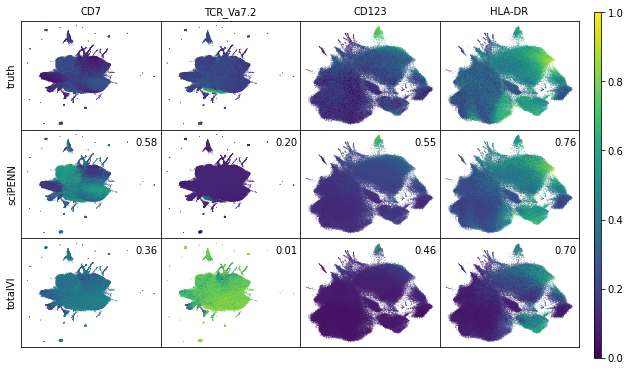

In [15]:
f, axs = plt.subplots(3, 4, figsize = (10, 6))
idx = -1

for name in datasets:
    dataset_haniffa, dataset_sanger = datasets[name]
    
    idx += 1
    for i, prot in enumerate(prots):
        if prots[prot]:
            dataset = dataset_sanger
            x, y = x_s, y_s
            corrs = corrs_sanger
        else:
            dataset = dataset_haniffa
            x, y = x_h, y_h
            corrs = corrs_haniffa
        
        expr = dataset[:, prot].X[:, 0]
        expr = (expr - np.min(expr))/(np.max(expr) - np.min(expr))
        
        
        axs[idx, i].scatter(x, y, c = expr, marker='.', s=1, linewidths=0, cmap = 'viridis')
        axs[idx, i].set_xticks([])
        axs[idx, i].set_yticks([])
        
        if not idx:
            axs[idx, i].set_title(prot, size = 10)
        else:
            axs[idx, i].set_title(f"{corrs[name].loc[prot].mean():.2f}", loc = 'right', x = 0.98, y = 0.8, size = 10)

        if not i:
            axs[idx, i].set_ylabel(name, size = 10)
            
PCM = axs[idx, i].get_children()[0]

cb_ax = f.add_axes([0.92, 0.1, 0.01, 0.8])
cbar = f.colorbar(PCM, cax=cb_ax)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace = 0., hspace  = 0.)

f.savefig('covidintegrate_fig/fplots.png', dpi = 300)